In [1]:
import collections
import numpy as np
from math import *
import networkx as nx
import matplotlib.pyplot as plt
from igraph import *

In [30]:
f1=open("out.brunson_south-africa_south-africa", 'rb')
f2 = open("out.brunson_southern-women_southern-women", 'rb')
lMsg1 = []
lNum = [str(i) for i in range(10)]
for x in f1:
    lMsg1.append(str(x))
lMsgReal1 = [[int(elem) for elem in line if elem in lNum] for line in lMsg1][2:]
lMsgReal1 = list(map(lambda x : tuple(x), lMsgReal1))

lMsg2 = []
for x in f2:
    lMsg2.append(str(x))
lMsgReal2 = [[int(elem) for elem in line if elem in lNum] for line in lMsg2][2:]
lMsgReal2 = list(map(lambda x : tuple(x), lMsgReal2))

In [31]:
G1 = nx.Graph()
G1.add_edges_from(lMsgReal1)

G2 = nx.Graph()
G2.add_edges_from(lMsgReal2)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


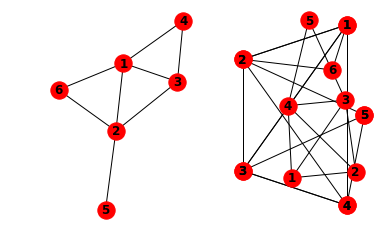

In [32]:
plt.subplot(121)
nx.draw(G1, with_labels=True, font_weight='bold')

plt.subplot(122)
nx.draw(G2, with_labels=True, font_weight='bold')
nx.draw_shell(G1,nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
nx.draw_shell(G2,nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.savefig("First.png")
plt.show()

(1, 1)
(1, 2)
(1, 3)
(2, 1)
(2, 3)
(3, 4)
(3, 3)
(4, 1)
(4, 3)
(5, 5)
(5, 2)
(6, 1)
(6, 2)
(1, 1)
(1, 2)
(1, 3)
(2, 2)
(2, 3)
(3, 1)
(3, 4)
(3, 5)
(4, 1)
(4, 4)
(4, 2)
(5, 4)
(5, 3)
(5, 5)


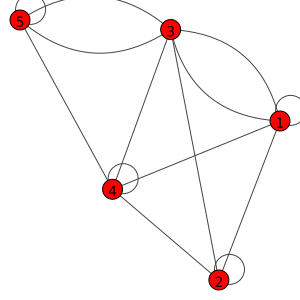

In [35]:
n = 6
g1 = Graph(directed=False)
g1.add_vertices(n)

for edge in lMsgReal1:
    print(edge)
    g1.add_edge(edge[0] - 1,edge[1] - 1)
g1.vs["label"] = [i + 1 for i in range(n)]
out = plot(g1, bbox = (300, 300), margin = 20)
out.save("Graph1.png")


n = 5
g2 = Graph(directed=False)
g2.add_vertices(n)

for edge in lMsgReal2:
    print(edge)
    g2.add_edge(edge[0] - 1,edge[1] - 1)
g2.vs["label"] = [i + 1 for i in range(n)]
out = plot(g2, bbox = (300, 300), margin = 20)
out.save("Graph2.png")
out


[(1, 5), (2, 5), (3, 4), (4, 6), (5, 4)]


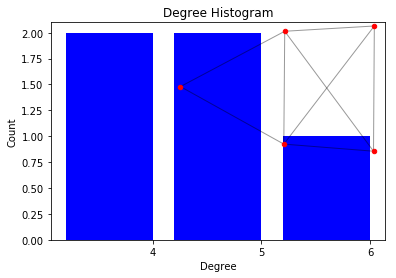

In [44]:
degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)  # degree sequence
print(G2.degree)
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G2), key=len, reverse=True)[0]
pos = nx.spring_layout(G2)
plt.axis('off')
nx.draw_networkx_nodes(G2, pos, node_size=20)
nx.draw_networkx_edges(G2, pos, alpha=0.4)
plt.savefig('DegreeDistrib2.png')


plt.show()

## Part III Mathematical Toolbox

In [9]:
import scipy.stats as st
import random
import seaborn as sns

In [2]:
def bernouilliProcess(p):
    return (p, p*(1-p))

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

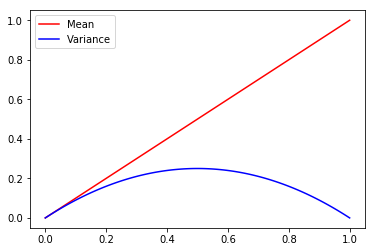

In [8]:
x = np.linspace(0,1,100)
print(x)
y1 = np.array([bernouilliProcess(p)[0] for p in x])
print(y1)
y2 = np.array([bernouilliProcess(p)[1]for p in x])
plt.plot(x,y1,'r', label = "Mean")
plt.plot(x,y2,'b', label = "Variance")
plt.legend()
plt.savefig("BernouilliProcess.png")

In [139]:
def randomWalk(n):
    state = 0
    lstState = [0]
    for i in range(n):
        if np.random.random() < 0.5:
            state -= 1
        else:
            state += 1
        lstState.append(state)
    lstState = np.array(lstState)
    h = np.histogram(lstState)
    r = max(abs(lstState.min()), lstState.max())
#     plt.figure(1)
#     plt.subplot(221)
#     plt.hist(lstState[:int(n/4)], range = (-r,r), density=True, alpha = 0.3,histtype='stepfilled')
#     plt.subplot(222)
#     plt.hist(lstState[:int(n/2)], range = (-r,r), density=True, alpha = 0.3,histtype='stepfilled')
#     plt.subplot(223)
#     plt.hist(lstState[:int(3*n/4)], range = (-r,r), density=True, alpha = 0.3,histtype='stepfilled')
#     plt.subplot(224)
#     plt.hist(lstState, range = (-r,r), density=True, alpha = 0.3,histtype='stepfilled')
    plt.figure(1)
    plt.subplot(121)
    sns.distplot(lstState[:int(n/4)], hist=False, kde=True, 
             bins=r, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, label = 'T/4')
    mu1, std1 = st.norm.fit(lstState[:int(n/4)])
    sns.distplot(lstState[:int(n/2)], hist=False, kde=True, 
             bins=r, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, label = 'T/2')
    mu2, std2 = st.norm.fit(lstState[:int(n/2)])
    sns.distplot(lstState[:int(3*n/4)], hist=False, kde=True, 
             bins=r, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, label = '3T/4')
    mu3, std3 = st.norm.fit(lstState[:int(3*n/4)])
    sns.distplot(lstState, hist=False, kde=True, 
             bins=r, color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},label = 'T')
    mu4, std4 = st.norm.fit(lstState)
    plt.subplot(122)
    
    x = np.linspace(-r, r, 2000)
    p1 = st.norm.pdf(x, mu1, std1)
    plt.plot(x, p1, 'r', linewidth=2,label = 'T/4')
    
    p2 = st.norm.pdf(x, mu2, std2)
    plt.plot(x, p2, 'b', linewidth=2,label = 'T/2')
    
    p3 = st.norm.pdf(x, mu3, std3)
    plt.plot(x, p3, 'g', linewidth=2,label = '3T/4')
    
    p4 = st.norm.pdf(x, mu4, std4)
    plt.plot(x, p4, 'k', linewidth=2,label = 'T')
    plt.legend()
    plt.savefig("RW5.png")
    return 0

0

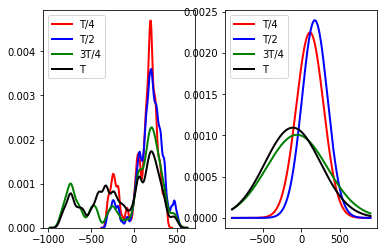

In [153]:
randomWalk(1000000)

In [42]:
st.bernoulli.rvs(0.5)

1

11.165374878196516
101.02982235762464
500.8395031293043


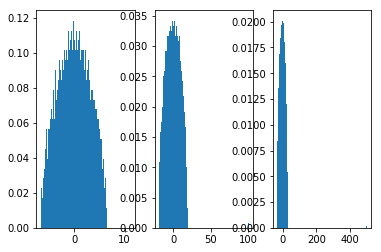

In [15]:
N = 1000
p = 0.01
b = np.zeros((1000,1000))
for i in range(N):
    for j in range(i):
        var = st.bernoulli.rvs(p)
        b[i,j] = var
        b[j,i] = var
lstEigTot = np.linalg.eig(b)
lstEig = lstEigTot[0]
lstEig.sort()
print(lstEig[-1])
plt.figure(1)
plt.subplot(131)
plt.hist(lstEig,100, density = True)

p = 0.1
b = np.zeros((1000,1000))
for i in range(N):
    for j in range(i):
        var = st.bernoulli.rvs(p)
        b[i,j] = var
        b[j,i] = var
lstEigTot = np.linalg.eig(b)
lstEig = lstEigTot[0]
lstEig.sort()
print(lstEig[-1])
plt.subplot(132)
plt.hist(lstEig,100, density = True)

p = 0.5
b = np.zeros((1000,1000))
for i in range(N):
    for j in range(i):
        var = st.bernoulli.rvs(p)
        b[i,j] = var
        b[j,i] = var
lstEigTot = np.linalg.eig(b)
lstEig = lstEigTot[0]
lstEig.sort()
print(lstEig[-1])
plt.subplot(133)
plt.hist(lstEig,100, density = True)


plt.savefig("DistribEig2.png")

In [12]:
print(lstEig[0])
print(lstEig[-2])

-19.164733322467434
18.672026584020085


(1, 2)
(2, 3)
(3, 4)
(4, 1)
(1, 3)


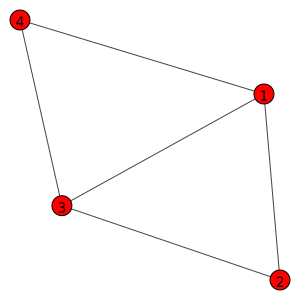

In [91]:
n = 4
g1 = Graph(directed=False)
g1.add_vertices(n)
lstEdge = [(1,2),(2,3),(3,4),(4,1),(1,3)]
for edge in lstEdge:
    print(edge)
    g1.add_edge(edge[0] - 1,edge[1] - 1)
g1.vs["label"] = [i + 1 for i in range(n)]
out = plot(g1, bbox = (300, 300), margin = 20)
out.save("ClusteringCoef.png")
out

In [25]:
n = 100
k = 3
p = 0.001
nShort = 0
g1 = Graph(directed=False)
g1.add_vertices(n)
for i in range(n):
    for j in range(k):
        g1.add_edge(i, (i + j + 1) % n)
        g1.vs["label"] = [i + 1 for i in range(n)]
for i in range(n):
    for j in range(i + k + 1,n):
        te = np.random.random()
        if te < p:
            g1.add_edge(i,j)
            nShort += 1
print(nShort)
print(g1.diameter(directed=True, unconn=True, weights=None))
print(g1.transitivity_undirected())
#out = plot(g1, bbox = (300, 300), margin = 20)
#out

1
17
0.5952380952380952


[17, 17, 11, 14, 14, 10, 11, 12, 9, 9, 9, 11, 8, 9, 8, 8, 7, 8, 7, 8, 8, 7, 8, 7, 8, 7, 8, 7, 7, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[-0.5108256237659907, -0.5187937934151675, -0.526698972922281, -0.5345421503833068, -0.5423242908253616, -0.5473593670984467, -0.5477588788116731, -0.555994592133902, -0.5728610146854433, -0.5809733836680724, -0.577836334048951, -0.5870529891538749, -0.5871793159614939, -0.6103692541022523, -0.6139319450064413, -0.6214215799916302, -0.6159238099364784, -0.6309451090833937, -0.6296248459074393, -0.6371415045998051, -0.6527376422220686, -0.6524390229115758, -0.6626316366339949, -0.6660961245389376, -0.6853909089885862, -0.6816054201197738, -0.6817184847363225, -0.6953234599825409, -0.6963992159463227, -0.7083318540982625, -0.7306413849875258, -0.7161489970167734, -0.7367376166348071,

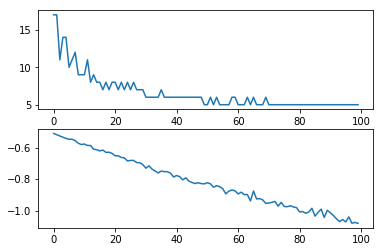

In [41]:
n = 100
k = 3
nExp = 100
lDiameters = []
x = [i for i in range(nExp)]
lClustering = []
for nShort in range(nExp):
    lstEdgesPot = []
    g1 = Graph(directed=False)
    g1.add_vertices(n)
    for i in range(n):
        for j in range(k):
            g1.add_edge(i, (i + j + 1) % n)
            g1.vs["label"] = [i + 1 for i in range(n)]
    for i in range(n):
        for j in range(i + k + 1,n):
            lstEdgesPot.append((i,j))
    lstEdges = random.sample(lstEdgesPot, nShort)
    for edge in lstEdges:
        g1.add_edge(edge[0], edge[1])
    lDiameters.append(g1.diameter(directed=False, unconn=True, weights=None))
    lClustering.append(log(g1.transitivity_undirected()))
print(lDiameters)
print(lClustering)
plt.figure(1)
plt.subplot(211)
plt.plot(x, lDiameters)
plt.subplot(212)
plt.plot(x, lClustering)

#print(g1.diameter(directed=True, unconn=True, weights=None))
#print(g1.transitivity_undirected())

#out = plot(g1, bbox = (300, 300), margin = 20)
#out

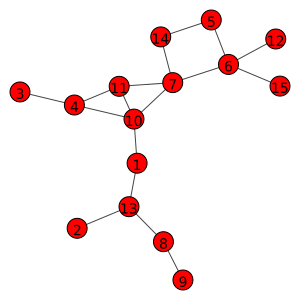

In [49]:
n = 100
p = 0.2
lDiameters = []
x = [i for i in range(nExp)]
lClustering = []

lstEdgesPot = []
g1 = Graph(directed=False)
g1.add_vertices(n)
for i in range(n):
    g1.vs["label"] = [i + 1 for i in range(n)]
for i in range(n):
    for j in range(i+1,n):
        if np.random.random() < p:
            g1.add_edge(i, j)

g1.betweenness(vertices=None, directed=False)
g1.closeness(vertices = , directed = False)
#print(g1.diameter(directed=True, unconn=True, weights=None))
#print(g1.transitivity_undirected())

out = plot(g1, bbox = (300, 300), margin = 20)
out

(0.9814659855371354, 4.9176419594361616e-144)
(0.9814659855371354, 4.9176419594361616e-144)


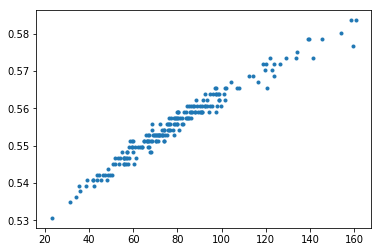

In [20]:
n = 200
p = 0.2
lBetweenness = []
lCLoseness = []
g1 = Graph(directed=False)
g1.add_vertices(n)
for i in range(n):
    g1.vs["label"] = [i + 1 for i in range(n)]
for i in range(n):
    for j in range(i+1,n):
        if np.random.random() < p:
            g1.add_edge(i, j)

for i in range(n):
    lBetweenness.append(g1.betweenness(vertices=i))
    lCLoseness.append(g1.closeness(vertices = i))


R1 = st.pearsonr(lBetweenness, lCLoseness)
R2 = st.pearsonr(lCLoseness, lBetweenness)
lIndex = [i for i in range(n)]

lIndex = sorted(lIndex, key = lambda x : lBetweenness[x])
lBetweennessFin = [lBetweenness[i] for i in lIndex]
lCLosenessFin = [lCLoseness[i] for i in lIndex]
plt.plot(lBetweenness,lCLoseness,'.')
print(R1)
print(R2)
plt.savefig("Correlation.png")

In [65]:
print(g1.betweenness(vertices = 9))
print(g1.closeness(vertices = 9))

0.0
0.3103448275862069


16.0


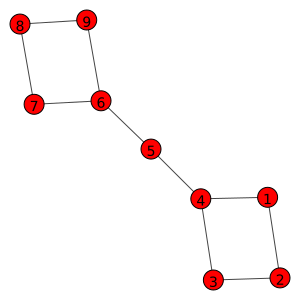

In [80]:
n = 9
g1 = Graph(directed=False)
g1.add_vertices(n)
lstEdge = [(1,2),(2,3),(3,4),(4,1),(4,5), (5,6), (6,7),(7,8), (8,9), (9,6)]
for edge in lstEdge:
    g1.add_edge(edge[0] - 1,edge[1] - 1)
g1.vs["label"] = [i + 1 for i in range(n)]
out = plot(g1, bbox = (300, 300), margin = 20)
print(g1.betweenness(vertices = 4))
out